<a href="https://colab.research.google.com/github/Kunaltembhare003/EDA/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in that locale. 

**Data** <br>
This dataset has around 48894 observation in it with 16 colums(numerical and catagoriacal value).



In [ ]:
pip install geopandas


     |████████████████████████████████| 994 kB 14.6 MB/s 
     |████████████████████████████████| 15.4 MB 36 kB/s 
     |████████████████████████████████| 6.6 MB 56.8 MB/s 


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import point, polygon

%matplotlib inline



**Aquaring and loading data** <br>
Loding a data into appropriate format for analysis. 

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [77]:
working_path = '/content/drive/MyDrive/alma_better/capstone_project/EDA/'


In [ ]:
df = pd.read_csv(working_path+'Airbnb_NYC_2019.csv')
df.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


In [ ]:
#checking basic information about dataset  like number of colums and rows, data type total number of nullll value. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

After loading dataset and from looking of head and info of data. we can see number of things.
1. NaN value  
2. most number of NaN value present in last_review and 'review per_month' colum 
3. dataset divided into numerical and catogorical datatype.
4. 48895 rows and 16 colums 

we need to do data cleaning data and it must tp handle NaN  value before data exploration.





#**Data cleaing and wrangling**


after looking into dataset, column 'id','name', 'last_review' is irrelevent for to our data analysis. missing value does not need special treatment. column 'reviews_per_month' has ~10,000 NaN value which can be converted into 0.0.

In [ ]:
#drooping columns 
df.drop(['id','name','last_review'], axis=1, inplace=True)
df.head(3)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365


In [ ]:
#converting all NaN value to zero.
df.fillna(0,inplace=True)
df.head(3)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365


number of neighboorhood group are listed 

In [ ]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
#number of neighbourhood listed?
len(df['neighbourhood'].unique())

221

In [ ]:
#number of types of room listed
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

number of listed properties which available for zero days can be drop. 
  

In [ ]:
df=df.loc[~(df['availability_365'] == 0) | (df['reviews_per_month'] == 0)].reset_index() 
df.head(3)
len(df)

36207

In [ ]:
#set figure size
sns.set(rc={'figure.figsize':(11.7,8.27)}) 

#data visuvalization

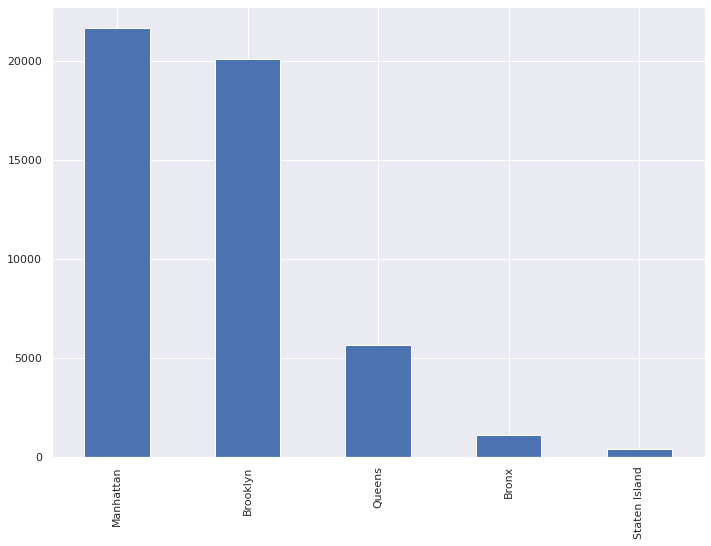

In [ ]:
#number of listing at neughbourhood group
df['neighbourhood_group'].value_counts().plot(kind='bar')

In [ ]:
df.groupby('neighbourhood_group')['price'].max().reset_index()

,neighbourhood_group,price
0,Bronx,2500
1,Brooklyn,10000
2,Manhattan,10000
3,Queens,10000
4,Staten Island,5000


minimum and maximum price neighbourhood wise

In [ ]:
nei_max = df.groupby(['neighbourhood_group','neighbourhood'])['price'].max().reset_index()
nei_min =df.groupby(['neighbourhood_group','neighbourhood'])['price'].min().reset_index()
nei_avg =df.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()

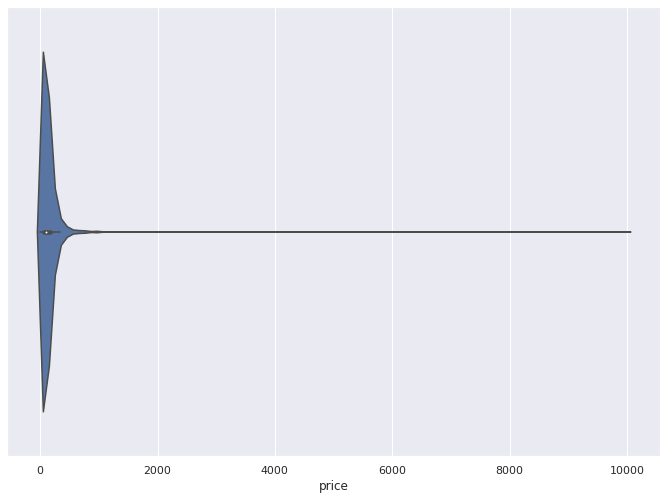

In [ ]:
#price distribution according to room type in neighbourhood_group
sns.violinplot(x=df['price'])

find out number of airbnb acomodation facility at neighboorhood of **manhattan** 

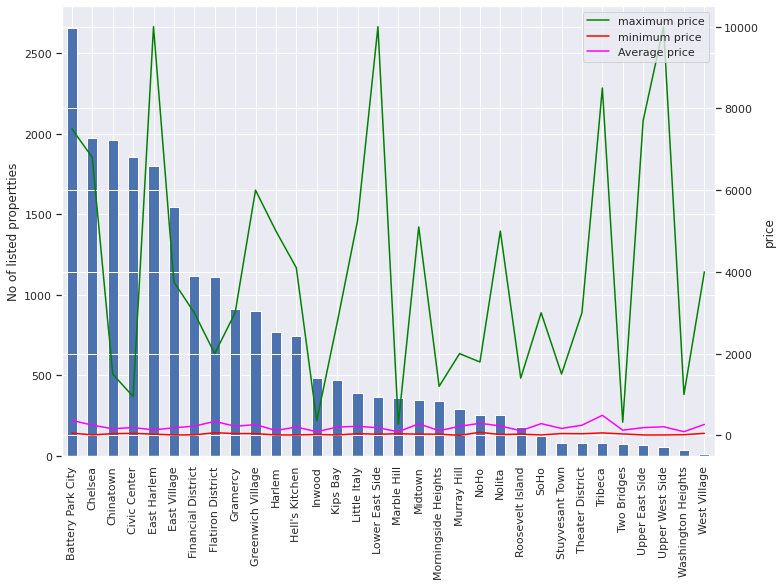

In [ ]:
man_data = df[df['neighbourhood_group'] == 'Manhattan']
man_ax1 = man_data['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties')
ax2 = man_ax1.twinx() # create axis 2 for prrice listing
sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=nei_max[nei_max['neighbourhood_group' ]== 'Manhattan'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=nei_min[nei_min['neighbourhood_group' ]== 'Manhattan'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Average price',
             data=nei_avg[nei_avg['neighbourhood_group' ]== 'Manhattan'])
plt.legend(loc='upper right') #set legend position
plt.show()



find out number of airbnb acomodation facility at neighboorhood of **manhattan** depend on room  type **private room**


---



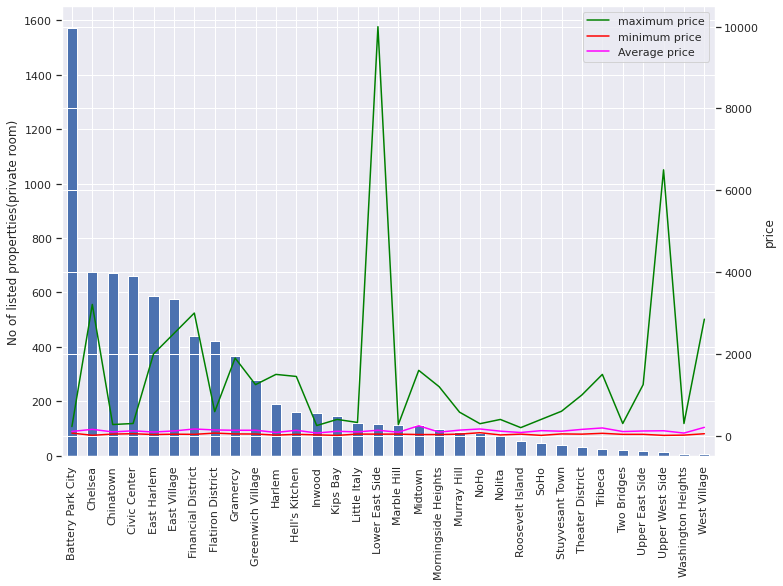

In [ ]:
pri_room = man_data[man_data['room_type']=='Private room']
man_ax1 = pri_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(private room)')

ax2 = man_ax1.twinx() # create axis 2 for prrice listing
sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=pri_room.groupby(['neighbourhood'])['price'].max().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=pri_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Average price',
             data=pri_room.groupby(['neighbourhood'])['price'].mean().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()


find out number of airbnb acomodation facility at neighboorhood of **manhattan** depend on room  type **Entire home/apt**

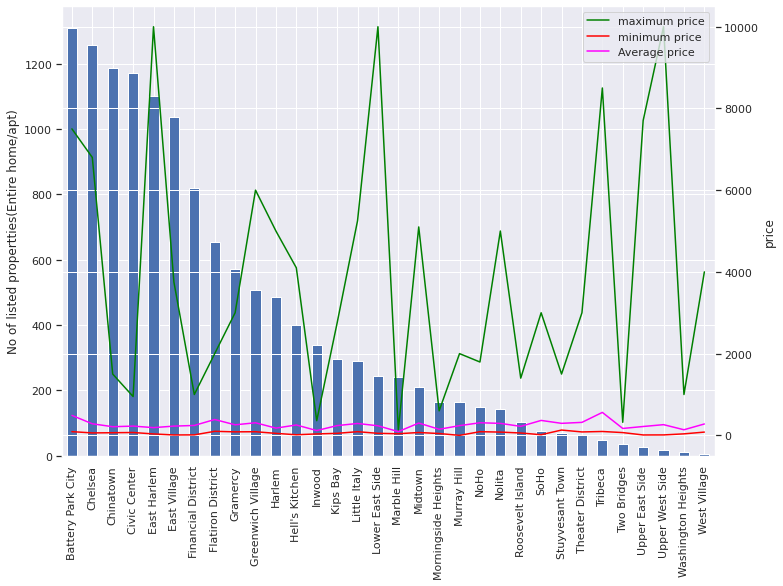

In [ ]:
apt_room = man_data[man_data['room_type']=='Entire home/apt']
man_ax1 = apt_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Entire home/apt)')

ax2 = man_ax1.twinx() # create axis 2 for prrice listing
sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=apt_room.groupby(['neighbourhood'])['price'].max().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=apt_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Average price',
             data=apt_room.groupby(['neighbourhood'])['price'].mean().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()

find out number of airbnb acomodation facility at neighboorhood of **manhattan** depend on room  type **Shared room**

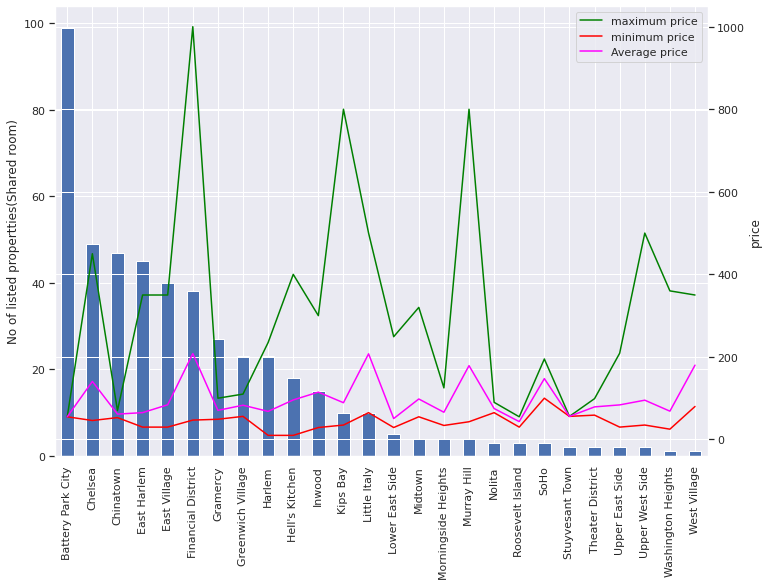

In [ ]:
shr_room = man_data[man_data['room_type']=='Shared room']
man_ax1 = shr_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Shared room)')

ax2 = man_ax1.twinx() # create axis 2 for prrice listing
sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=shr_room.groupby(['neighbourhood'])['price'].max().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=shr_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Average price',
             data=shr_room.groupby(['neighbourhood'])['price'].mean().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()

find out number of airbnb acomodation facility at neighboorhood of **Brooklyn** 

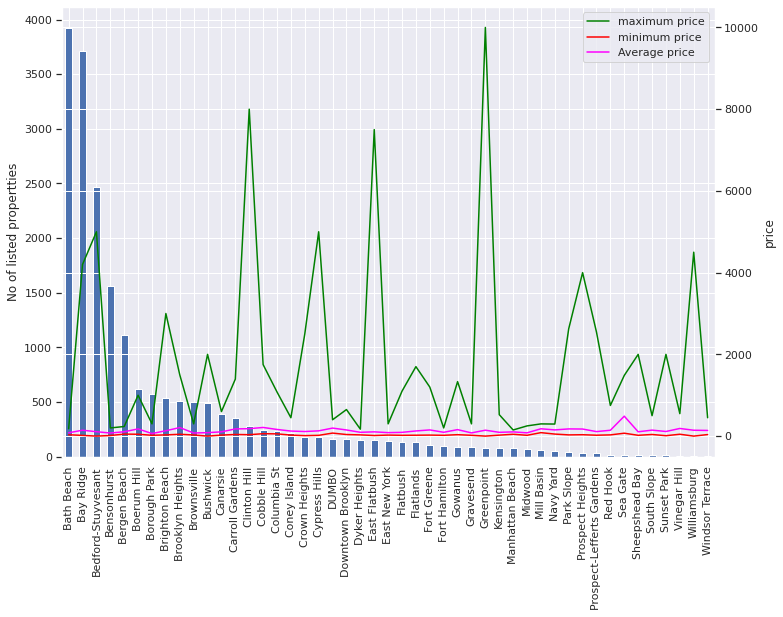

In [ ]:
brooklyn_data = df[df['neighbourhood_group'] == 'Brooklyn']
sns.set(rc={'figure.figsize':(11.7,8.27)})
bro_ax1 =brooklyn_data['neighbourhood'].value_counts().plot(kind="bar",
                                              ylabel='No of listed propertties')
ax2 = bro_ax1.twinx() # create axis 2 for prrice listing
sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=nei_max[nei_max['neighbourhood_group' ]== 'Brooklyn'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=nei_min[nei_min['neighbourhood_group' ]== 'Brooklyn'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Average price',
             data=nei_avg[nei_avg['neighbourhood_group' ]== 'Brooklyn'])
plt.legend(loc='upper right') #set legend position
plt.show()

find out number of airbnb acomodation facility at neighboorhood of **Brooklyn** depend on room  type **private room**

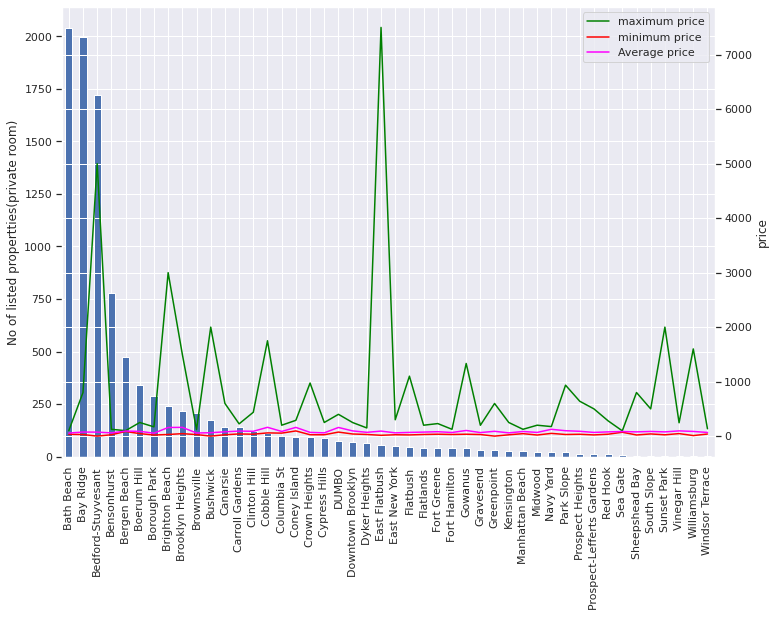

In [ ]:
b_pri_room = brooklyn_data[brooklyn_data['room_type']=='Private room']
bro_ax1 = b_pri_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(private room)')

ax2 = bro_ax1.twinx() # create axis 2 for prrice listing
sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=b_pri_room.groupby(['neighbourhood'])['price'].max().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=b_pri_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Average price',
             data=b_pri_room.groupby(['neighbourhood'])['price'].mean().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()

find out number of airbnb acomodation facility at neighboorhood of **Brooklyn** depend on room type **entire apt**

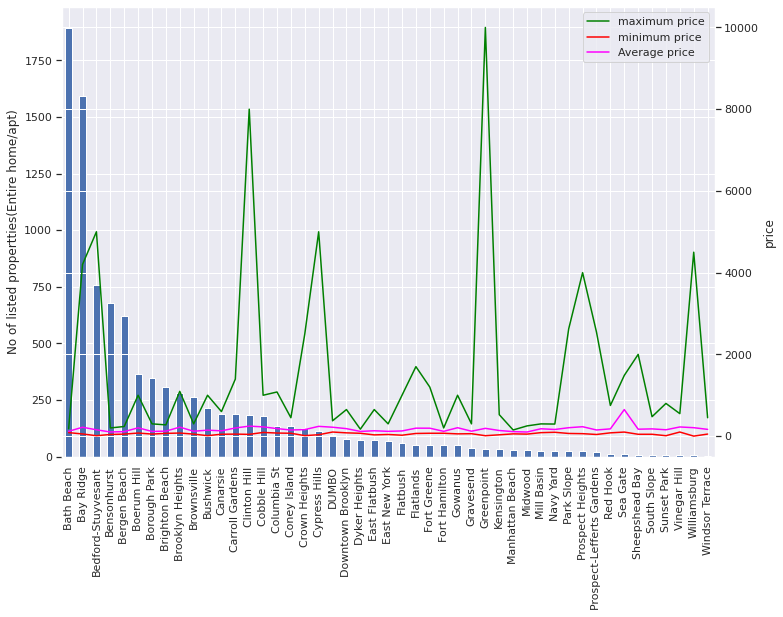

In [ ]:
b_apt_room = brooklyn_data[brooklyn_data['room_type']=='Entire home/apt']
man_ax1 =b_apt_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Entire home/apt)')

ax2 = man_ax1.twinx() # create axis 2 for prrice listing
sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=b_apt_room.groupby(['neighbourhood'])['price'].max().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=b_apt_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Average price',
             data=b_apt_room.groupby(['neighbourhood'])['price'].mean().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()

find out number of airbnb acomodation facility at neighboorhood of **Brooklyn** depend on room type **shared room**

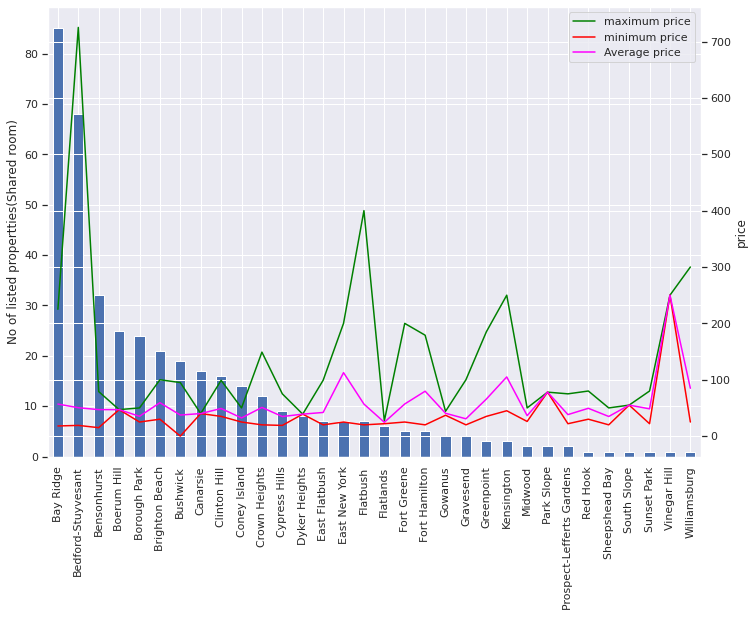

In [ ]:
b_apt_room = brooklyn_data[brooklyn_data['room_type']=='Shared room']
bro_ax1 =b_apt_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Shared room)')

ax2 = bro_ax1.twinx() # create axis 2 for prrice listing
sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=b_apt_room.groupby(['neighbourhood'])['price'].max().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=b_apt_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Average price',
             data=b_apt_room.groupby(['neighbourhood'])['price'].mean().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()

find out number of airbnb acomodation facility at neighboorhood of **Queens** 

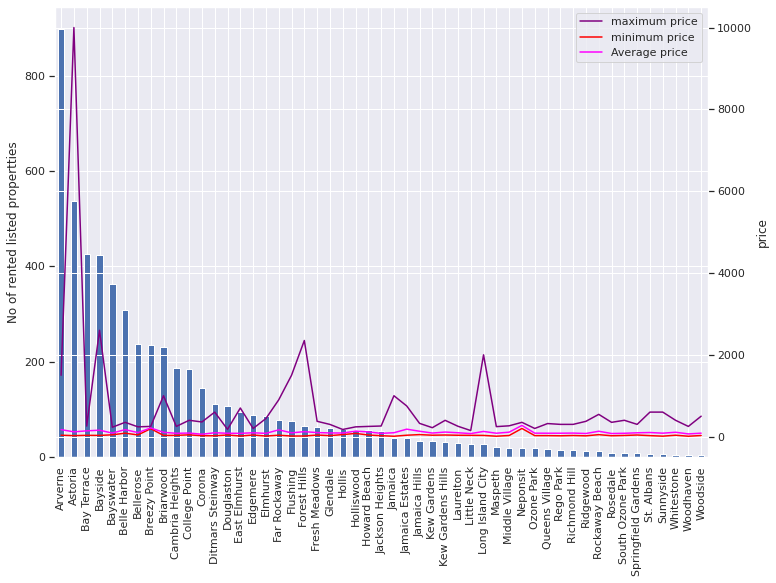

In [ ]:
Queens_data = df[df['neighbourhood_group'] == 'Queens']
sns.set(rc={'figure.figsize':(11.7,8.27)})
que_ax1 = Queens_data['neighbourhood'].value_counts().plot(kind="bar",
                                              ylabel='No of rented listed propertties')

ax2 = que_ax1.twinx() # create axis 2 for prrice listing
sns.lineplot(x='neighbourhood', 
             y='price',
             color='purple',
             label='maximum price',
             data=nei_max[nei_max['neighbourhood_group' ]== 'Queens'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=nei_min[nei_min['neighbourhood_group' ]== 'Queens'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Average price',
             data=nei_avg[nei_avg['neighbourhood_group' ]== 'Queens'])
plt.legend(loc='upper right') #set legend position
plt.show()

find out number of airbnb acomodation facility at neighboorhood of **Bronx** 

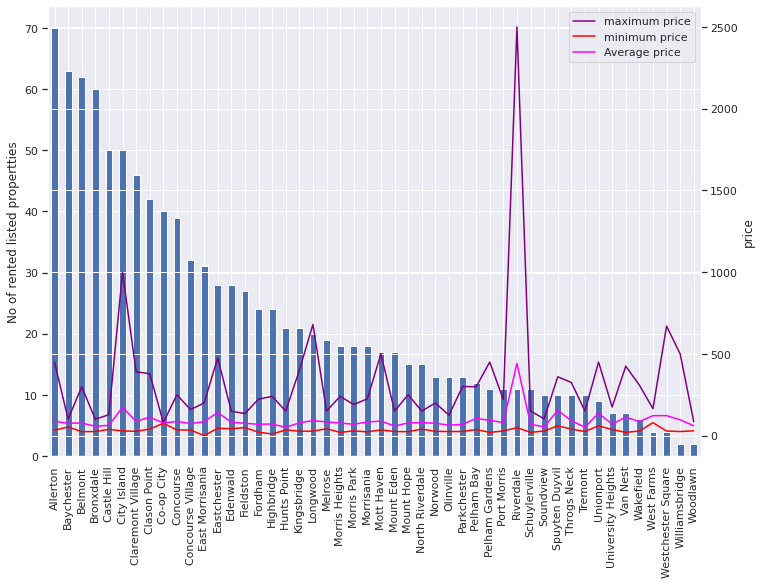

In [ ]:
bronx_data = df[df['neighbourhood_group'] == 'Bronx']
bro_ax1 = bronx_data['neighbourhood'].value_counts().plot(kind="bar",
                                                          ylabel='No of rented listed propertties')
ax2 = bro_ax1.twinx() # create axis 2 for prrice listing
sns.lineplot(x='neighbourhood', 
             y='price',
             color='purple',
             label='maximum price',
             data=nei_max[nei_max['neighbourhood_group' ]== 'Bronx'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=nei_min[nei_min['neighbourhood_group' ]== 'Bronx'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Average price',
             data=nei_avg[nei_avg['neighbourhood_group' ]== 'Bronx'])
plt.legend(loc='upper right') #set legend position
plt.show()

find out number of airbnb acomodation facility at neighboorhood of **Bronx** depend on room type **private room**

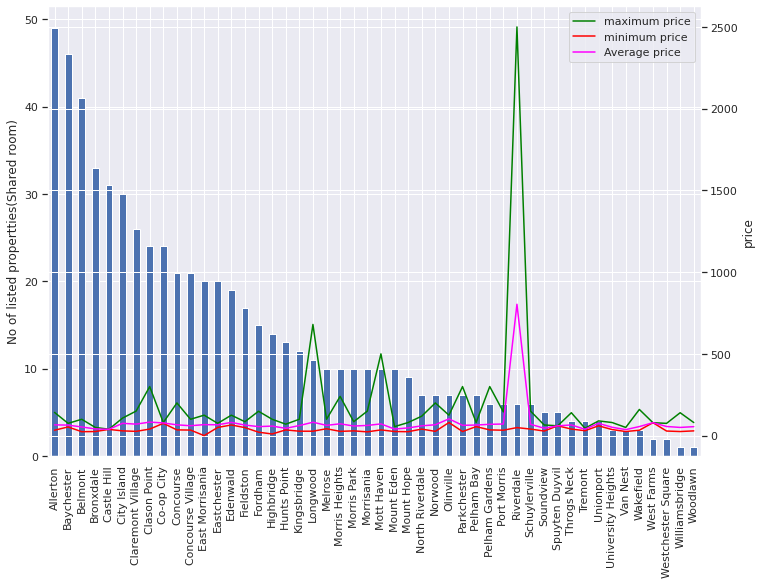

In [ ]:
bronx_pri_room = bronx_data[bronx_data['room_type']=='Private room']
bronx_ax1 =bronx_pri_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Shared room)')

ax2 = bronx_ax1.twinx() # create axis 2 for prrice listing
sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=bronx_pri_room.groupby(['neighbourhood'])['price'].max().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=bronx_pri_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Average price',
             data=bronx_pri_room.groupby(['neighbourhood'])['price'].mean().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()

find out number of airbnb acomodation facility at neighboorhood of **Bronx** depend on room type **Entire apt**

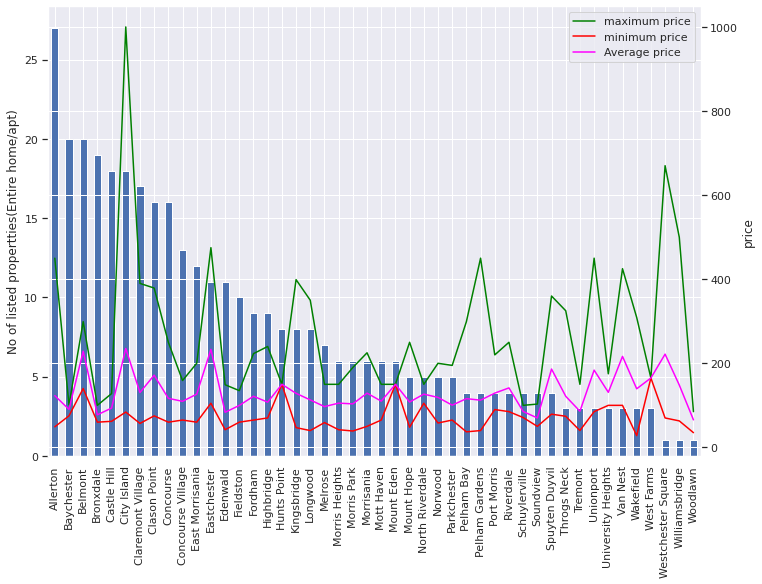

In [ ]:
bronx_apt_room = bronx_data[bronx_data['room_type']=='Entire home/apt']
bro_ax1 =bronx_apt_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Entire home/apt)')

ax2 = bro_ax1.twinx() # create axis 2 for prrice listing
sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=bronx_apt_room.groupby(['neighbourhood'])['price'].max().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=bronx_apt_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Average price',
             data=bronx_apt_room.groupby(['neighbourhood'])['price'].mean().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()

find out number of airbnb acomodation facility at neighboorhood of **Bromx** depend on room type **shared room**

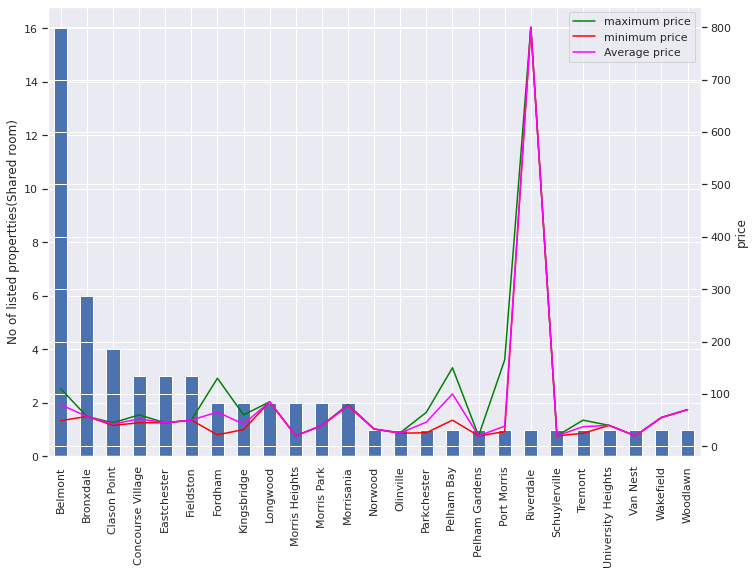

In [ ]:
bronx_shr_room = bronx_data[bronx_data['room_type']=='Shared room']
bronx_ax1 =bronx_shr_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Shared room)')

ax2 = bronx_ax1.twinx() # create axis 2 for prrice listing
sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=bronx_shr_room.groupby(['neighbourhood'])['price'].max().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=bronx_shr_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Average price',
             data=bronx_shr_room.groupby(['neighbourhood'])['price'].mean().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()

find out number of airbnb acomodation facility at neighboorhood of **Staten Island** 

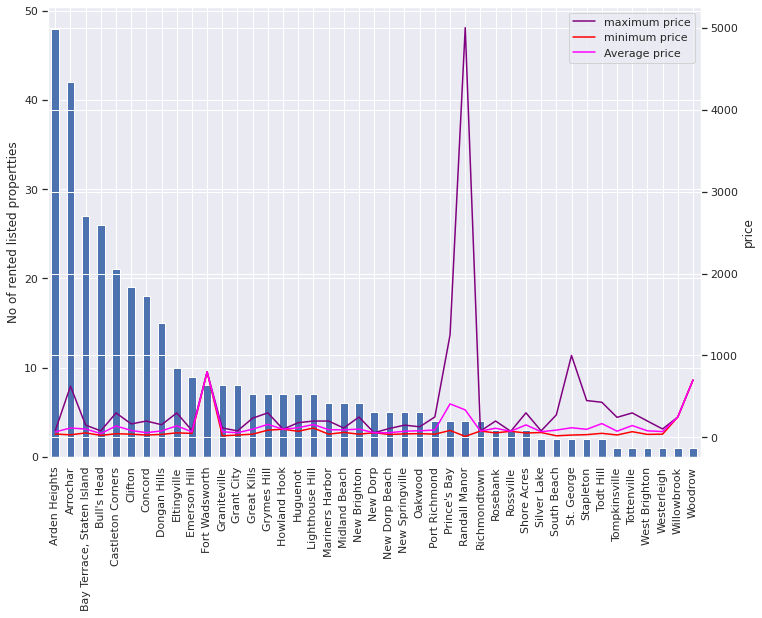

In [ ]:
staten_is_data = df[df['neighbourhood_group'] == 'Staten Island']

sta_ax1 = staten_is_data['neighbourhood'].value_counts().plot(kind="bar",
                                              ylabel='No of rented listed propertties')
ax2 = sta_ax1.twinx() # create axis 2 for prrice listing
sns.lineplot(x='neighbourhood', 
             y='price',
             color='purple',
             label='maximum price',
             data=nei_max[nei_max['neighbourhood_group' ]== 'Staten Island'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=nei_min[nei_min['neighbourhood_group' ]== 'Staten Island'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Average price',
             data=nei_avg[nei_avg['neighbourhood_group' ]== 'Staten Island'])
plt.legend(loc='upper right') #set legend position
plt.show()

find out number of airbnb acomodation facility at neighboorhood of **Staten Island** 

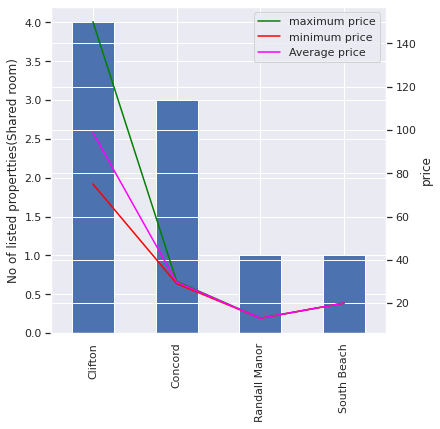

In [ ]:
staten_shr_room = staten_is_data[staten_is_data['room_type']=='Shared room']
sns.set(rc={'figure.figsize':(6,6)})
staten_ax1 =staten_shr_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Shared room)')
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax2 = staten_ax1.twinx() # create axis 2 for prrice listing
sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=staten_shr_room.groupby(['neighbourhood'])['price'].max().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=staten_shr_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Average price',
             data=staten_shr_room.groupby(['neighbourhood'])['price'].mean().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()

In [ ]:
#df.groupby(['availability_365','reviews_per_month']) and df['availability_365'>= 100]
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
av_365 = df.loc[~((df['availability_365'] <= 200) | (df['calculated_host_listings_count']<=50)| (df['reviews_per_month'] == 0))].reset_index()
av_365=av_365.groupby(["host_id",'host_name','calculated_host_listings_count'],as_index=False)['reviews_per_month','availability_365'].mean()
av_365.sort_values('reviews_per_month',ascending=True)
av_365

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,host_id,host_name,calculated_host_listings_count,reviews_per_month,availability_365
0,1475015,Mike,52,0.088780,340.341463
1,7503643,Vida,52,0.099535,328.744186
2,12243051,Sonder,96,0.304074,306.000000
3,16098958,Jeremy & Laura,96,0.122456,309.912281
4,22541573,Ken,87,0.113333,337.111111
5,30283594,Kara,121,0.091111,345.555556
6,61391963,Corporate Housing,91,0.297255,313.039216
7,107434423,Blueground,232,0.216667,295.041667
8,137358866,Kazuya,103,0.443684,241.473684
9,200380610,Pranjal,65,1.000000,342.000000


In [ ]:
av_365.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         11 non-null     int64  
 1   host_name                       11 non-null     object 
 2   calculated_host_listings_count  11 non-null     int64  
 3   reviews_per_month               11 non-null     float64
 4   availability_365                11 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 528.0+ bytes


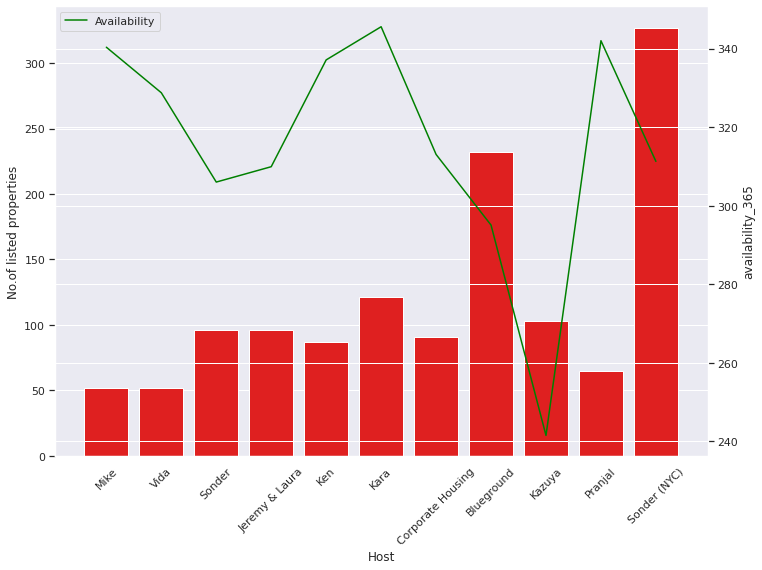

In [ ]:

sns.set(rc={'figure.figsize':(11.7,8.27)}) #set figure size
ax_ava = sns.barplot(x="host_name",
                 y="calculated_host_listings_count", 
                 data=av_365,color="red")

ax_ava.set(ylabel="No.of listed properties",
           xlabel="Host")
plt.xticks(rotation=45)

ax2_ava = ax_ava.twinx() # create axis 2 for prrice listing
ax2_ava = sns.lineplot(x='host_name', 
             y='availability_365',
             color='green',
             label='Availability',
             data=av_365)
ax2_ava.legend(ncol=2, 
               loc="upper left")
plt.show()

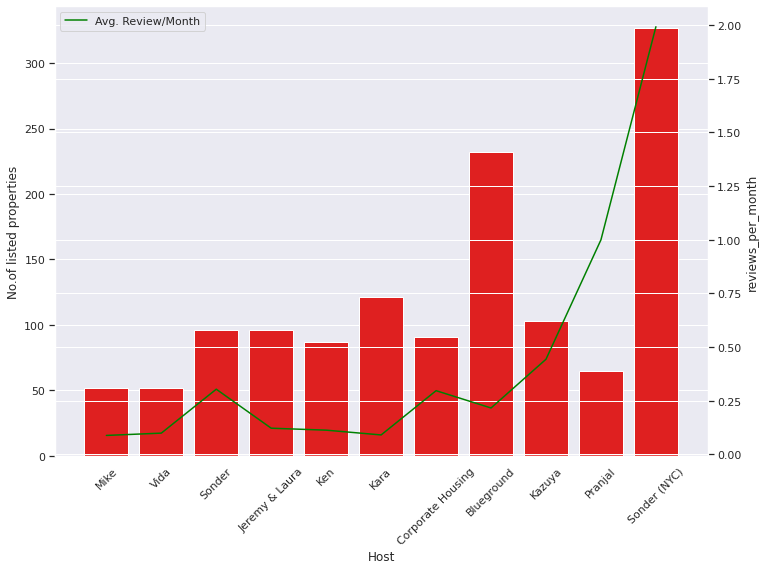

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) #set figure size
ax_rev = sns.barplot(x="host_name",
                 y="calculated_host_listings_count",
                 data=av_365,color="red")
plt.xticks(rotation=45)

ax_rev.set(ylabel="No.of listed properties",
       xlabel="Host")
ax2_rev = ax_rev.twinx() # create axis 2 for reviews_per_month

ax2_rev = sns.lineplot(x='host_name', 
             y='reviews_per_month',
             color='green',
             label='Avg. Review/Month',
             data=av_365)
ax2_rev.legend(ncol=2, loc="upper left")
plt.show()

#geo map 

In [86]:
#to create price heat map on map we can use latitude and longitude
listing = df.loc[:,['longitude','latitude','price','availability_365']]
listing.head(3)

,longitude,latitude,price,availability_365
0,-73.97237,40.64749,149,365
1,-73.98377,40.75362,225,355
2,-73.94190,40.80902,150,365


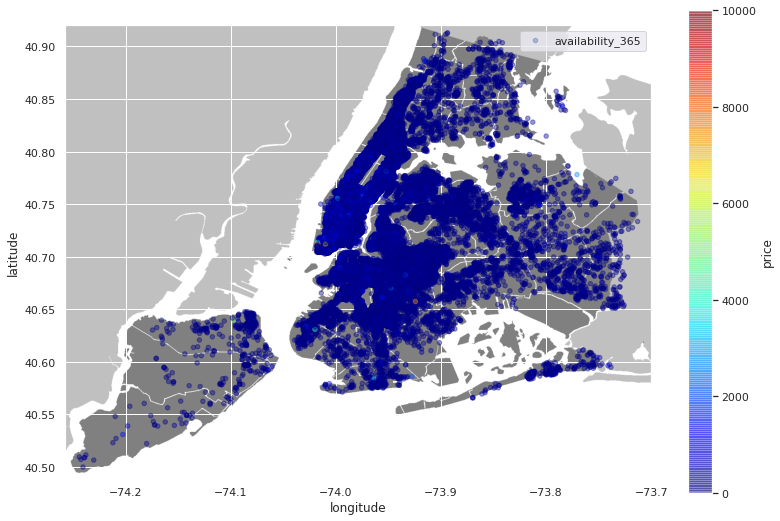

In [87]:
import urllib
sns.set(rc={'figure.figsize':(11.7,8.27)}) 
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
listing.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()